# Load libraries and data

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas
import umap.umap_ as umap
from sklearn.manifold import TSNE

In [2]:
%matplotlib notebook

In [3]:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rcParams["font.family"] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [7]:
linear_exp = np.load('Linear Accuracy.npz')['data']
nonlinear_exp = np.array(n_dat['AdamW_lr_0.031954_bs_256_lrf_0.0226_b1_0.9983_b2_0.9975_swalr_0.000034_3000_v_20 - accuracy'][0:1391])

In [9]:
train_lin = np.load('Train_Data_Cell_linear.npz')['train_data_fc1']
test_lin = np.load('Test_Data_Cell_linear.npz')['test_data_fc1']\

train_labs = np.load('Train_Data_Cell_linear.npz')['train_labels']
test_labs = np.load('Test_Data_Cell_linear.npz')['test_labels']

train_nlin = np.load('Train_Data_Cell_Nonlinear.npz')['train_data_fc2']
test_nlin = np.load('Test_Data_Cell_Nonlinear.npz')['test_data_fc2']

data_lin = np.concatenate([train_lin, test_lin], axis=0)
data_nlin = np.concatenate([train_nlin, test_nlin], axis=0)
data_labs = np.concatenate([train_labs, test_labs])

print(data_lin.shape)
print(data_nlin.shape)
print(data_labs.shape)

(1200, 4)
(1200, 4)
(1200,)


# t-SNE

In [10]:
nlin_embedded = TSNE(n_components=2, init='random').fit_transform(train_nlin)
lin_embedded = TSNE(n_components=2, init='random').fit_transform(train_lin)

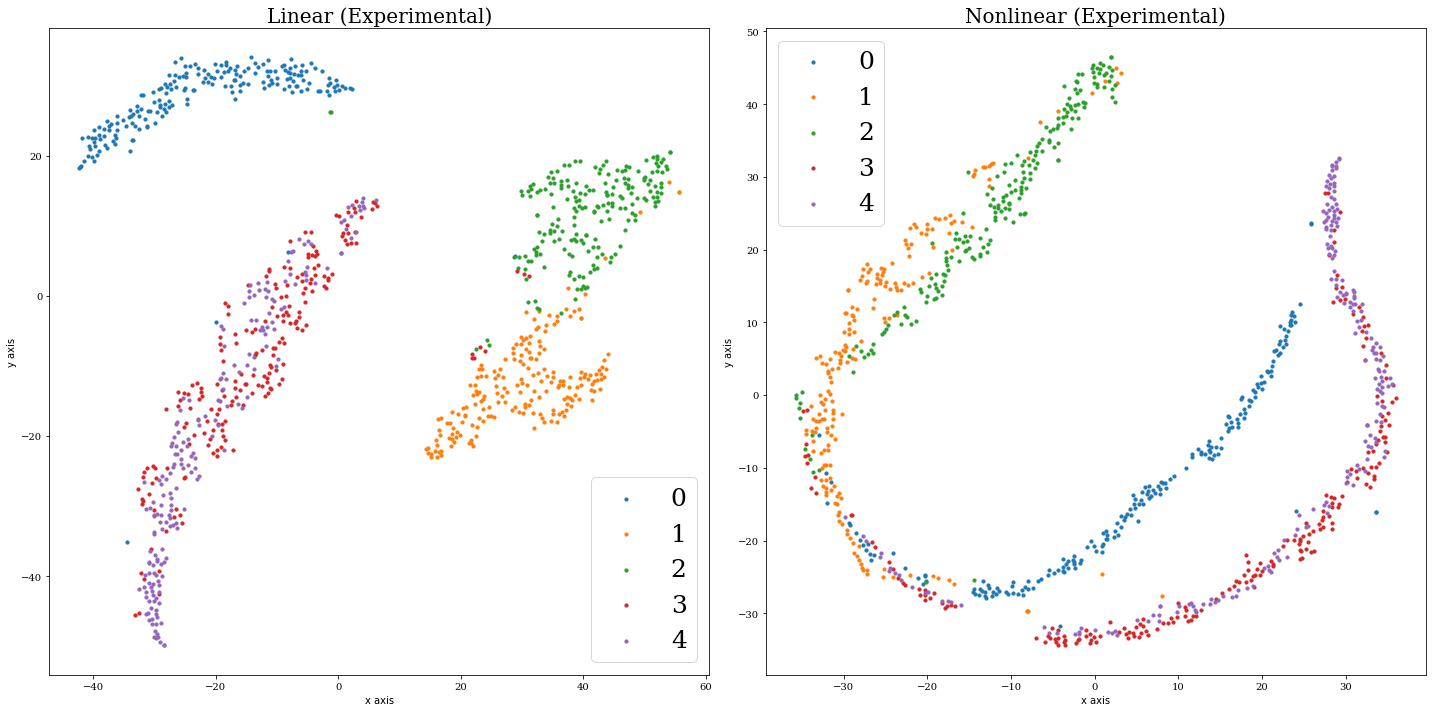

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
for i in range(5):
    idx = train_labs == i
    #ax.scatter(points[idx,0], points[idx,1], alpha=1, label=i,s=2)
    ax[0].scatter(lin_embedded[idx,0], lin_embedded[idx,1], alpha=1, label=i,s=10)
# axes labels and title
ax[0].set_xlabel('x axis', fontname='Arial')
ax[0].set_ylabel('y axis', fontname ='Arial')
ax[0].set_title('Linear (Experimental)', fontsize = 20)
#plt.title(“title”)
#auto legend setting and figure config
ax[0].legend(fontsize = 25)

for i in range(5):
    idx = train_labs == i
    #ax.scatter(points[idx,0], points[idx,1], alpha=1, label=i,s=2)
    ax[1].scatter(nlin_embedded[idx,0], nlin_embedded[idx,1], alpha=1, label=i,s=10)
# axes labels and title
ax[1].set_xlabel('x axis', fontname='Arial')
ax[1].set_ylabel('y axis', fontname='Arial')
#plt.title(“title”)
#auto legend setting and figure config
ax[1].legend(fontsize = 25)
ax[1].set_title('Nonlinear (Experimental)', fontsize = 20)
plt.tight_layout()
#plt.savefig('Latent_space_lin_vs_nonlin.png', dpi = 1200)
plt.show()

# UMAP

In [13]:
reducer = umap.UMAP()

In [16]:
embedding_nlin = reducer.fit_transform(train_nlin)
print(embedding_nlin.shape)
embedding_lin = reducer.fit_transform(train_lin)
print(embedding_lin.shape)

(1000, 2)
(1000, 2)


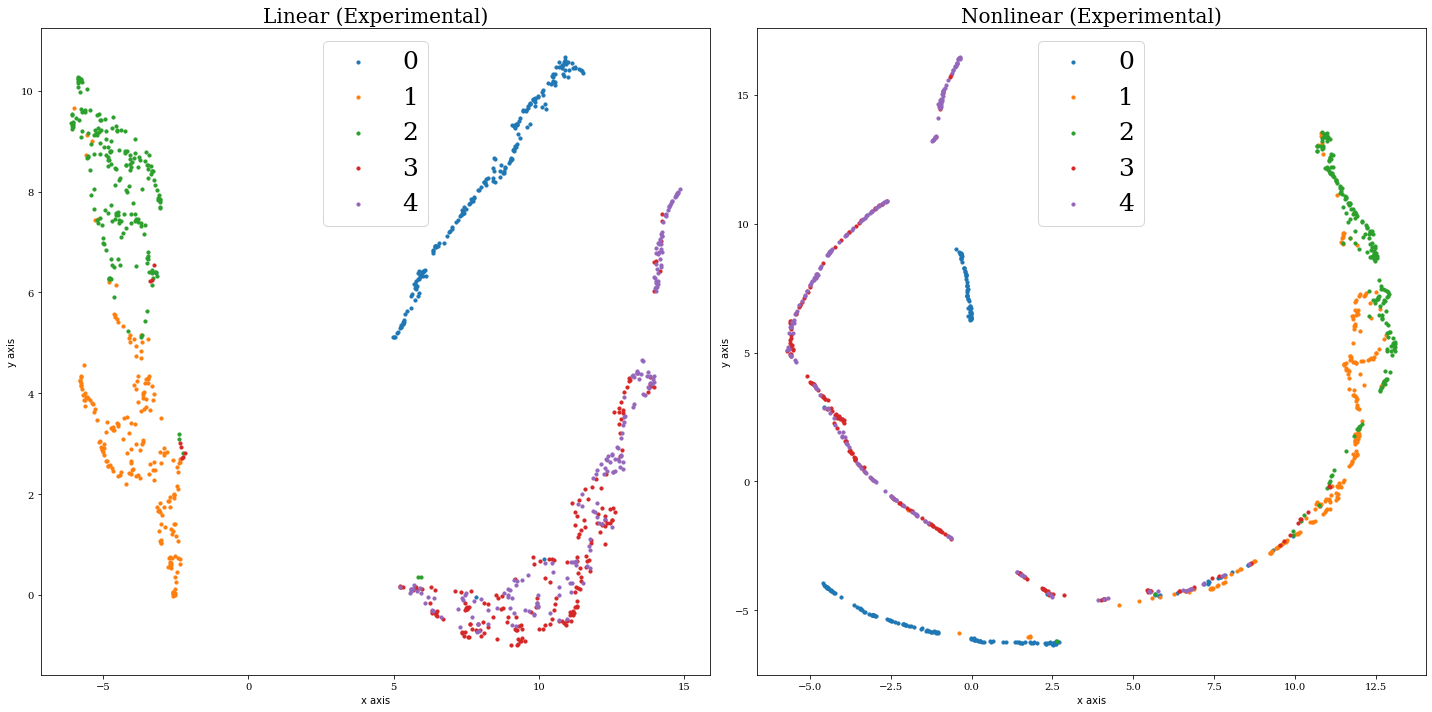

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
for i in range(5):
    idx = train_labs == i
    #ax.scatter(points[idx,0], points[idx,1], alpha=1, label=i,s=2)
    ax[0].scatter(embedding_lin[idx,0], embedding_lin[idx,1], alpha=1, label=i,s=10)
# axes labels and title
ax[0].set_xlabel('x axis', fontname='Arial')
ax[0].set_ylabel('y axis', fontname ='Arial')
ax[0].set_title('Linear (Experimental)', fontsize = 20)
#plt.title(“title”)
#auto legend setting and figure config
ax[0].legend(fontsize = 25)

for i in range(5):
    idx = train_labs == i
    #ax.scatter(points[idx,0], points[idx,1], alpha=1, label=i,s=2)
    ax[1].scatter(embedding_nlin[idx,0], embedding_nlin[idx,1], alpha=1, label=i,s=10)
# axes labels and title
ax[1].set_xlabel('x axis', fontname='Arial')
ax[1].set_ylabel('y axis', fontname='Arial')
#plt.title(“title”)
#auto legend setting and figure config
ax[1].legend(fontsize = 25)
ax[1].set_title('Nonlinear (Experimental)', fontsize = 20)
plt.tight_layout()
#plt.savefig('Latent_space_lin_vs_nonlin.png', dpi = 1200)
plt.show()

# Dense UMAP

In [11]:
params = [10, 1.0]
embedding_nlin =  umap.UMAP(densmap=True, n_neighbors=params[0], min_dist=params[1]).fit_transform(data_nlin)
print(embedding_nlin.shape)
embedding_lin =  umap.UMAP(densmap=True, n_neighbors=params[0], min_dist=params[1]).fit_transform(data_lin)
print(embedding_lin.shape)

/usr/local/anaconda/envs/NN_v2/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(1200, 2)
(1200, 2)


<IPython.core.display.Javascript object>


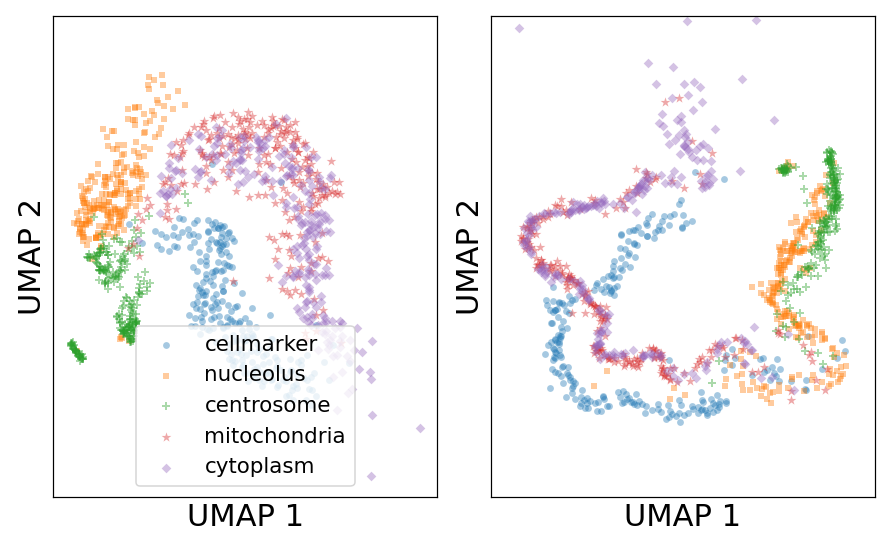

In [12]:
idx2class = {0:'cellmarker', 1:'nucleolus', 2:'centrosome', 3:'mitochondria', 4:'cytoplasm'}
mks = {0:'o', 1:'s', 2:"P", 3:"*", 4:"D"}
mksizes = {0:20, 1:15, 2:25, 3:45, 4:20}

fig, ax = plt.subplots(1, 2, figsize=(5*1.62, 5))
for i in range(5):
    idx = data_labs == i
    #ax.scatter(points[idx,0], points[idx,1], alpha=1, label=i,s=2)
    ax[0].scatter(embedding_lin[idx,0], embedding_lin[idx,1], alpha=0.4, label=idx2class[i], s=mksizes[i], marker=mks[i], linewidth=0)
# axes labels and title
ax[0].set_xlabel('UMAP 1', fontsize=20)
ax[0].set_ylabel('UMAP 2', fontsize=20)
ax[0].set_ylim(-15.2, 25)
ax[0].set_xticks([])
ax[0].set_yticks([])
# ax[0].set_title('Linear (Experimental)')
#auto legend setting and figure config
ax[0].legend()

for i in range(5):
    idx = data_labs == i
    #ax.scatter(points[idx,0], points[idx,1], alpha=1, label=i,s=2)
    ax[1].scatter(embedding_nlin[idx,0], embedding_nlin[idx,1], alpha=0.4, label=idx2class[i], s=mksizes[i], marker=mks[i], linewidth=0)
# axes labels and title
ax[1].set_xlabel('UMAP 1', fontsize=20)
ax[1].set_ylabel('UMAP 2', fontsize=20)
ax[1].set_xlim(-14.8, 22)
ax[1].set_ylim(-20, 33)
ax[1].set_xticks([])
ax[1].set_yticks([])

#auto legend setting and figure config
# ax[1].legend()
# ax[1].set_title('Nonlinear (Experimental)')

plt.tight_layout()
# plt.savefig('DensMAP_lin_vs_nonlin_'+ '_'.join(list(map(lambda i: str(i), params))) +'2.svg', dpi = 1200, fmt='svg')
plt.show()

# PCA 

In [27]:
pca_object = PCA(n_components=4)
PCA_lin = pca_object.fit_transform(train_lin)
PCA_nlin = pca_object.fit_transform(train_nlin)

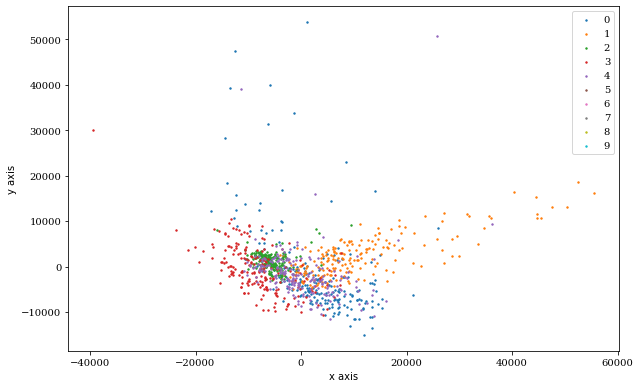

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5.5))
for i in range(10):
    idx = train_labs == i
    #ax.scatter(points[idx,0], points[idx,1], alpha=1, label=i,s=2)
    ax.scatter(PCA_lin[idx,2], PCA_lin[idx,3], alpha=1, label=i,s=2)
# axes labels and title
ax.set_xlabel('x axis', fontname='Arial')
ax.set_ylabel('y axis', fontname='Arial')
#plt.title(“title”)
#auto legend setting and figure config
ax.legend()
plt.tight_layout()
plt.show()

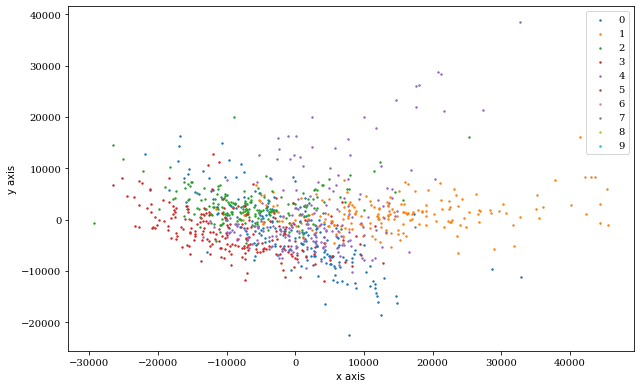

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5.5))
for i in range(10):
    idx = train_labs == i
    #ax.scatter(points[idx,0], points[idx,1], alpha=1, label=i,s=2)
    ax.scatter(PCA_nlin[idx,2], PCA_nlin[idx,3], alpha=1, label=i,s=2)
# axes labels and title
ax.set_xlabel('x axis', fontname='Arial')
ax.set_ylabel('y axis', fontname='Arial')
#plt.title(“title”)
#auto legend setting and figure config
ax.legend()
plt.tight_layout()
plt.show()

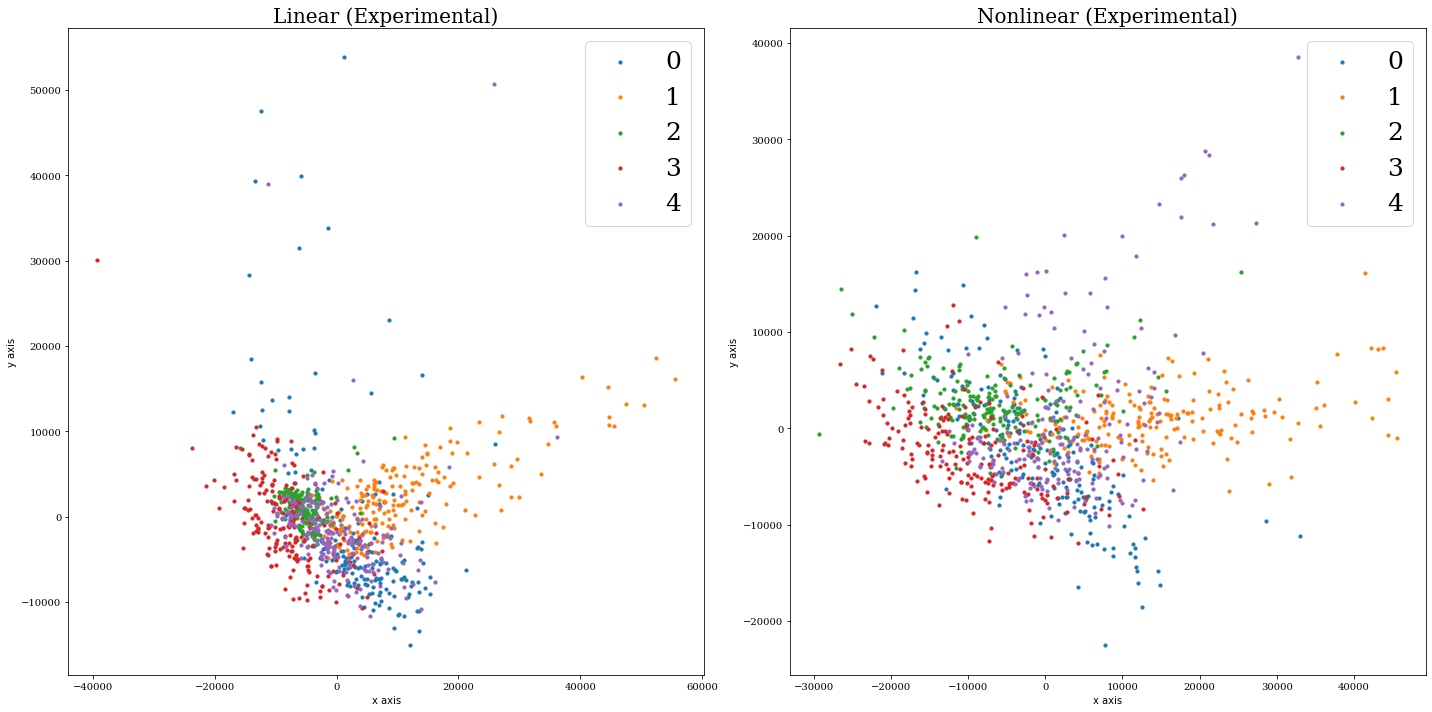

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
for i in range(5):
    idx = train_labs == i
    #ax.scatter(points[idx,0], points[idx,1], alpha=1, label=i,s=2)
    ax[0].scatter(PCA_lin[idx,2], PCA_lin[idx,3], alpha=1, label=i,s=10)
# axes labels and title
ax[0].set_xlabel('x axis', fontname='Arial')
ax[0].set_ylabel('y axis', fontname ='Arial')
ax[0].set_title('Linear (Experimental)', fontsize = 20)
#plt.title(“title”)
#auto legend setting and figure config
ax[0].legend(fontsize = 25)

for i in range(5):
    idx = train_labs == i
    #ax.scatter(points[idx,0], points[idx,1], alpha=1, label=i,s=2)
    ax[1].scatter(PCA_nlin[idx,2], PCA_nlin[idx,3], alpha=1, label=i,s=10)
# axes labels and title
ax[1].set_xlabel('x axis', fontname='Arial')
ax[1].set_ylabel('y axis', fontname='Arial')
#plt.title(“title”)
#auto legend setting and figure config
ax[1].legend(fontsize = 25)
ax[1].set_title('Nonlinear (Experimental)', fontsize = 20)
plt.tight_layout()
#plt.savefig('Latent_space_lin_vs_nonlin.png', dpi = 1200)
plt.show()

# PCA + t-SNE

In [32]:
nlin_embedded = TSNE(n_components=2, init='random').fit_transform(PCA_nlin[:, 2:].reshape(1000, 2))
lin_embedded = TSNE(n_components=2, init='random').fit_transform(PCA_lin[:, 2:].reshape(1000, 2))

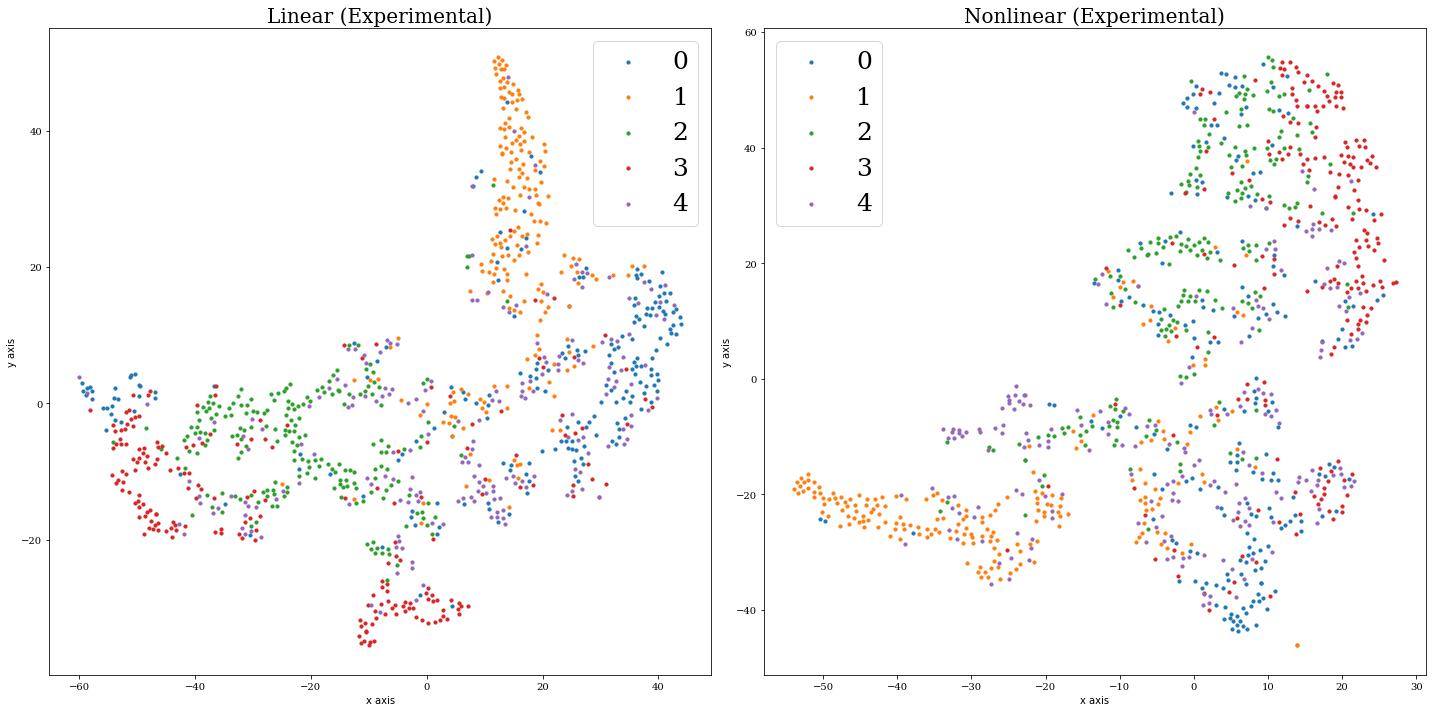

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
for i in range(5):
    idx = train_labs == i
    #ax.scatter(points[idx,0], points[idx,1], alpha=1, label=i,s=2)
    ax[0].scatter(lin_embedded[idx,0], lin_embedded[idx,1], alpha=1, label=i,s=10)
# axes labels and title
ax[0].set_xlabel('x axis', fontname='Arial')
ax[0].set_ylabel('y axis', fontname ='Arial')
ax[0].set_title('Linear (Experimental)', fontsize = 20)
#plt.title(“title”)
#auto legend setting and figure config
ax[0].legend(fontsize = 25)

for i in range(5):
    idx = train_labs == i
    #ax.scatter(points[idx,0], points[idx,1], alpha=1, label=i,s=2)
    ax[1].scatter(nlin_embedded[idx,0], nlin_embedded[idx,1], alpha=1, label=i,s=10)
# axes labels and title
ax[1].set_xlabel('x axis', fontname='Arial')
ax[1].set_ylabel('y axis', fontname='Arial')
#plt.title(“title”)
#auto legend setting and figure config
ax[1].legend(fontsize = 25)
ax[1].set_title('Nonlinear (Experimental)', fontsize = 20)
plt.tight_layout()
#plt.savefig('Latent_space_lin_vs_nonlin.png', dpi = 1200)
plt.show()

In [34]:
embedding_nlin = reducer.fit_transform(PCA_nlin[:, 2:].reshape(1000, 2))
print(embedding_nlin.shape)
embedding_lin = reducer.fit_transform(PCA_lin[:, 2:].reshape(1000, 2))
print(embedding_lin.shape)

(1000, 2)
(1000, 2)


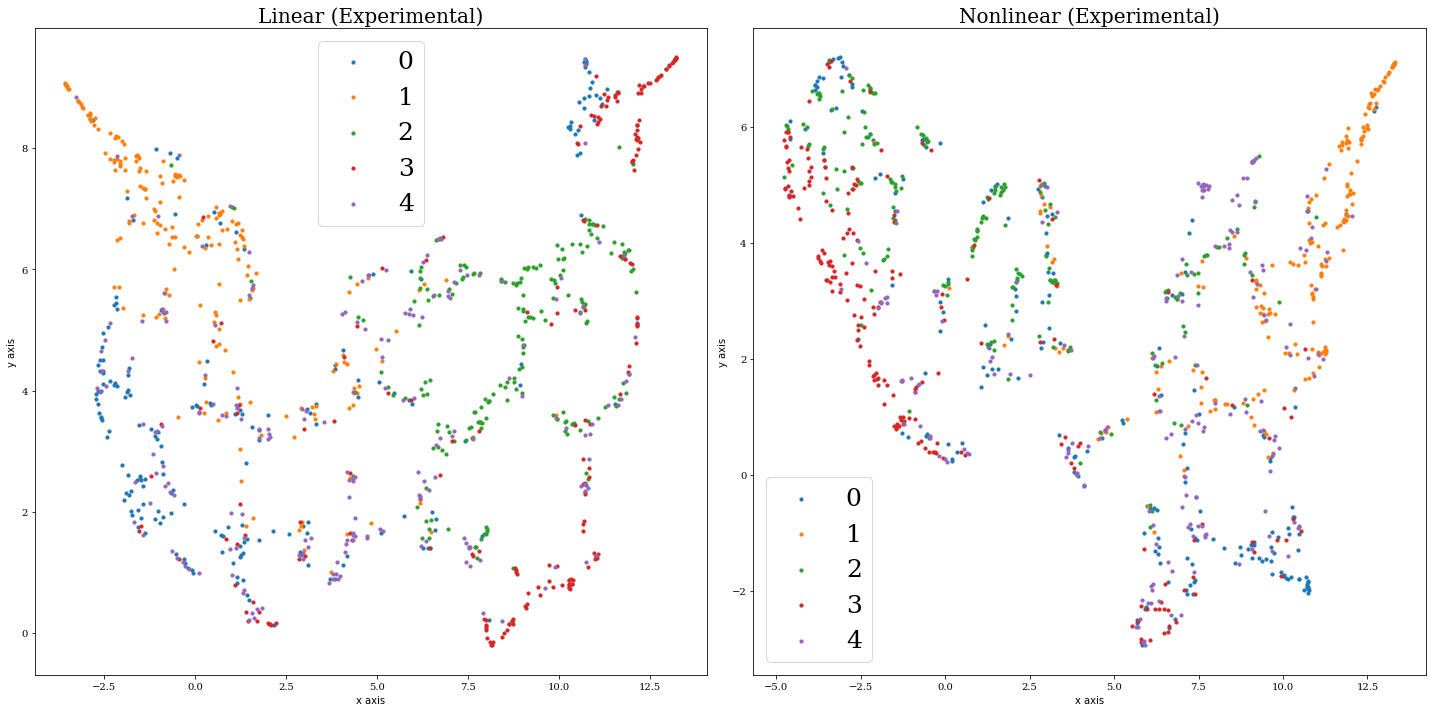

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
for i in range(5):
    idx = train_labs == i
    #ax.scatter(points[idx,0], points[idx,1], alpha=1, label=i,s=2)
    ax[0].scatter(embedding_lin[idx,0], embedding_lin[idx,1], alpha=1, label=i,s=10)
# axes labels and title
ax[0].set_xlabel('x axis', fontname='Arial')
ax[0].set_ylabel('y axis', fontname ='Arial')
ax[0].set_title('Linear (Experimental)', fontsize = 20)
#plt.title(“title”)
#auto legend setting and figure config
ax[0].legend(fontsize = 25)

for i in range(5):
    idx = train_labs == i
    #ax.scatter(points[idx,0], points[idx,1], alpha=1, label=i,s=2)
    ax[1].scatter(embedding_nlin[idx,0], embedding_nlin[idx,1], alpha=1, label=i,s=10)
# axes labels and title
ax[1].set_xlabel('x axis', fontname='Arial')
ax[1].set_ylabel('y axis', fontname='Arial')
#plt.title(“title”)
#auto legend setting and figure config
ax[1].legend(fontsize = 25)
ax[1].set_title('Nonlinear (Experimental)', fontsize = 20)
plt.tight_layout()
#plt.savefig('Latent_space_lin_vs_nonlin.png', dpi = 1200)
plt.show()